<a href="https://colab.research.google.com/github/Angelito1911/Desafio-Trabalho/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with lenght{len(uploaded[fn])}')

Saving dataset_vendas_ficticio.csv to dataset_vendas_ficticio (2).csv
User uploaded file "dataset_vendas_ficticio (2).csv" with lenght67302


In [ ]:
df = pd.read_csv('dataset_vendas_ficticio.csv')
df.head()

,data,produto,categoria,região,valor,quantidade,canal_venda,cliente_id
0,2025-03-29,Monitor,Eletrônicos,Sudeste,2291.61,6.0,Online,1011
1,2025-06-29,Tablet,Acessórios,Sul,1443.88,7.0,Online,1075
2,2024-11-01,Tablet,Periféricos,Sul,NaN,7.0,Marketplace,1020
3,2024-07-13,Mouse,Periféricos,Sudeste,1450.78,8.0,Loja Física,1001
4,2024-03-12,Tablet,Eletrônicos,Norte,1408.41,15.0,Online,1020


In [ ]:
print("\nValores nulos por coluna: ")
print(df.isnull().sum())


Valores nulos por coluna: 
data            0
produto        20
categoria      19
região          0
valor          20
quantidade     21
canal_venda     0
cliente_id      0
dtype: int64


In [ ]:
df = df.dropna(subset=["data"])

In [ ]:
colunas_texto = ["produto", "categoria", "região", "canal_venda", "cliente_id"]
for col in colunas_texto:
    df[col] = df[col].fillna("Não Informado")

In [ ]:
df["valor"] = df["valor"].fillna(df["valor"].median())
df["quantidade"] = df["quantidade"].fillna(df["quantidade"].median())


In [ ]:
print("\nDuplicatas antes:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicatas após:", df.duplicated().sum())



Duplicatas antes: 10
Duplicatas após: 0


In [ ]:
df["data"] = pd.to_datetime(df["data"], errors="coerce")
df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
df["quantidade"] = pd.to_numeric(df["quantidade"], errors="coerce")


In [ ]:
def remover_outliers_iqr(dataframe, coluna):
    Q1 = dataframe[coluna].quantile(0.25)
    Q3 = dataframe[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return dataframe[
        (dataframe[coluna] >= limite_inferior) &
        (dataframe[coluna] <= limite_superior)
    ]

In [ ]:
df = remover_outliers_iqr(df, "valor")
df = remover_outliers_iqr(df, "quantidade")

In [ ]:
df = df.reset_index(drop=True)

print("\nShape final:", df.shape)



Shape final: (978, 8)


In [ ]:
df.to_csv("/content/dataset_vendas_ficticio.csv", index=False)

print("\nArquivo tratado salvo como: dataset_vendas_ficticio.csv2")


Arquivo tratado salvo como: dataset_vendas_ficticio.csv2


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df

,data,produto,categoria,região,valor,quantidade,canal_venda,cliente_id
0,2025-03-29,Monitor,Eletrônicos,Sudeste,2291.61,6.0,Online,1011
1,2025-06-29,Tablet,Acessórios,Sul,1443.88,7.0,Online,1075
2,2024-11-01,Tablet,Periféricos,Sul,1527.40,7.0,Marketplace,1020
3,2024-07-13,Mouse,Periféricos,Sudeste,1450.78,8.0,Loja Física,1001
4,2024-03-12,Tablet,Eletrônicos,Norte,1408.41,15.0,Online,1020
5,2024-05-21,Tablet,Periféricos,Nordeste,780.11,1.0,Marketplace,1020
6,2024-06-27,Não Informado,Periféricos,Norte,1076.69,15.0,Online,1099
7,2024-12-04,Smartphone,Acessórios,Centro-Oeste,1906.54,18.0,Telefone,1047
8,2024-02-28,Smartphone,Periféricos,Sudeste,1421.35,8.0,Online,1077
9,2025-01-24,Monitor,Eletrônicos,Sul,2135.32,17.0,Marketplace,1037


In [ ]:
# Primeiro - Item mais vendido por sazonalidade (por mês)
df["mes"] = df["data"].dt.month

vendas_mes = (
    df.groupby(["mes", "produto"])["quantidade"]
    .sum()
    .reset_index()
)

mais_vendido_mes = vendas_mes.loc[
    vendas_mes.groupby("mes")["quantidade"].idxmax()
]

print(mais_vendido_mes.sort_values("mes"))

    mes     produto  quantidade
3     1    Notebook       126.0
9     2     Monitor       128.0
16    3  Impressora       167.0
26    4       Mouse       217.0
39    5     Teclado       143.0
43    6    Notebook       138.0
50    7       Mouse       187.0
57    8     Monitor       241.0
71    9     Teclado       198.0
72   10  Impressora       155.0
82   11       Mouse       176.0
92   12  Smartphone       152.0


In [ ]:
# Segundo - Período (mês) com mais vendas no ano
vendas_por_mes = df.groupby("mes")["quantidade"].sum()

mes_mais_vendas = vendas_por_mes.idxmax()
total_mes = vendas_por_mes.max()

print("Mês com mais vendas:", mes_mais_vendas)
print("Total vendido no mês:", total_mes)


Mês com mais vendas: 8
Total vendido no mês: 1061.0


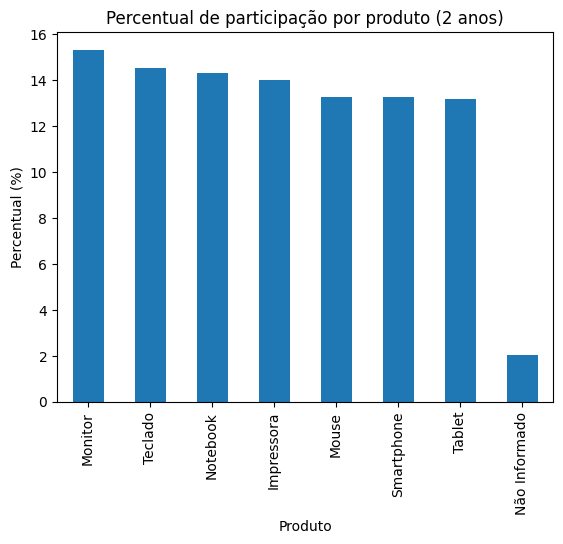

In [ ]:
# Terceiro - Percentual que cada item representa no período de 2 anos
import matplotlib.pyplot as plt

participacao = df["produto"].value_counts(normalize=True) * 100

plt.figure()
participacao.plot(kind="bar")
plt.title("Percentual de participação por produto (2 anos)")
plt.ylabel("Percentual (%)")
plt.xlabel("Produto")
plt.show()

          produto  canal_venda  quantidade
1      Impressora  Marketplace       369.0
2      Impressora       Online       358.0
3      Impressora     Telefone       351.0
0      Impressora  Loja Física       348.0
6         Monitor       Online       448.0
7         Monitor     Telefone       432.0
4         Monitor  Loja Física       344.0
5         Monitor  Marketplace       328.0
9           Mouse  Marketplace       449.0
10          Mouse       Online       419.0
8           Mouse  Loja Física       342.0
11          Mouse     Telefone       244.0
12       Notebook  Loja Física       477.0
13       Notebook  Marketplace       378.0
14       Notebook       Online       309.0
15       Notebook     Telefone       226.0
18  Não Informado       Online        95.0
17  Não Informado  Marketplace        68.0
16  Não Informado  Loja Física        41.0
19  Não Informado     Telefone         4.0
21     Smartphone  Marketplace       407.0
22     Smartphone       Online       374.0
20     Smar

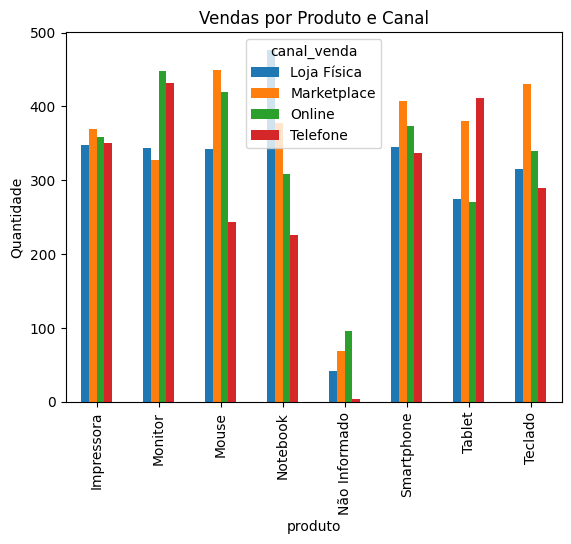

In [ ]:
# Quarto - Por onde cada item foi vendido (canal_venda)
vendas_canal = (
    df.groupby(["produto", "canal_venda"])["quantidade"]
    .sum()
    .reset_index()
)

print(vendas_canal.sort_values(["produto", "quantidade"], ascending=[True, False]))

tabela_pivot = df.pivot_table(
    values="quantidade",
    index="produto",
    columns="canal_venda",
    aggfunc="sum"
)

tabela_pivot.plot(kind="bar")
plt.title("Vendas por Produto e Canal")
plt.ylabel("Quantidade")
plt.show()

Produto MAIS vendido: Monitor
Melhor período: 2025-08
Canal: Marketplace
Quantidade: 74.0
SEGUNDO MENOS vendido: Tablet
Melhor período: 2025-11
Canal: Telefone
Quantidade: 54.0


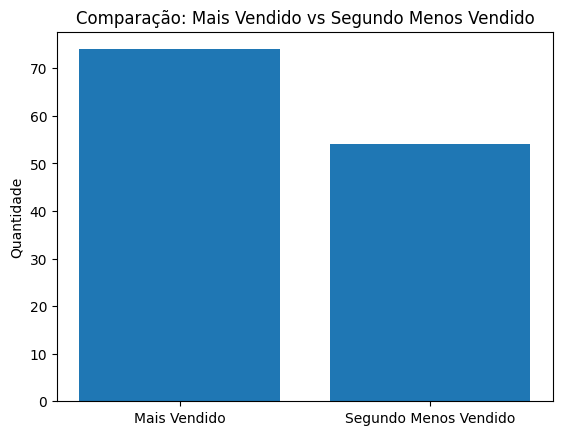

In [ ]:
# Quinto - GRÁFICO COMPLETO:

df["ano_mes"] = df["data"].dt.to_period("M")


total_produtos = df.groupby("produto")["quantidade"].sum().sort_values()

produto_mais = total_produtos.idxmax()

produto_segundo_menos = total_produtos.index[1]


mais_detalhe = (
    df[df["produto"] == produto_mais]
    .groupby(["ano_mes", "canal_venda"])["quantidade"]
    .sum()
    .reset_index()
)

melhor_linha = mais_detalhe.loc[mais_detalhe["quantidade"].idxmax()]


segundo_menos_detalhe = (
    df[df["produto"] == produto_segundo_menos]
    .groupby(["ano_mes", "canal_venda"])["quantidade"]
    .sum()
    .reset_index()
)

melhor_segundo_menos = segundo_menos_detalhe.loc[
    segundo_menos_detalhe["quantidade"].idxmax()
]

print("Produto MAIS vendido:", produto_mais)
print("Melhor período:", melhor_linha["ano_mes"])
print("Canal:", melhor_linha["canal_venda"])
print("Quantidade:", melhor_linha["quantidade"])

print("SEGUNDO MENOS vendido:", produto_segundo_menos)
print("Melhor período:", melhor_segundo_menos["ano_mes"])
print("Canal:", melhor_segundo_menos["canal_venda"])
print("Quantidade:", melhor_segundo_menos["quantidade"])


plt.figure()

plt.bar(
    ["Mais Vendido", "Segundo Menos Vendido"],
    [melhor_linha["quantidade"], melhor_segundo_menos["quantidade"]]
)

plt.title("Comparação: Mais Vendido vs Segundo Menos Vendido")
plt.ylabel("Quantidade")
plt.show()
